<a href="https://colab.research.google.com/github/g-e-o-m-e-t-r-i-c/ec3-ml/blob/master/dl01_mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Tutorial 1

This is a basic [Deep Learning tutorial](https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118) I followed.

The Deep Learning model aims to predict handwritten digits using the MNIST dataset.

This tutorial was coded on Google Colab.

In [ ]:
# @title Imports
import torch
!nvidia-smi

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

Wed Apr  5 07:40:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

device(type='cuda')

In [ ]:
# @title Datasets

from torchvision import datasets
from torchvision.transforms import ToTensor

# import training data
train_data = datasets.MNIST(
  root = 'data',
  train = True,
  transform = ToTensor(),
  download = True,
)

# import testing data
test_data = datasets.MNIST(
  root = 'data',
  train = False,
  transform = ToTensor()
)

# print(train_data)
# print(test_data)
# print(train_data.data.size(), '|', train_data.targets.size())

100%|██████████| 9912422/9912422 [00:00<00:00, 111584489.40it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26112458.25it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24967026.82it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18300219.76it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



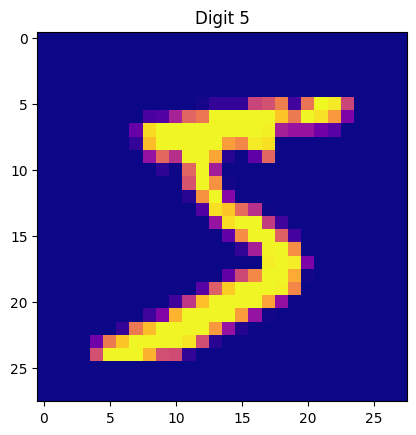

In [ ]:
# @title Visualisation of MNIST Dataset

# display one train_data
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_data.data[0], cmap='plasma')
plt.title("Digit %i" % train_data.targets[0])
plt.show()

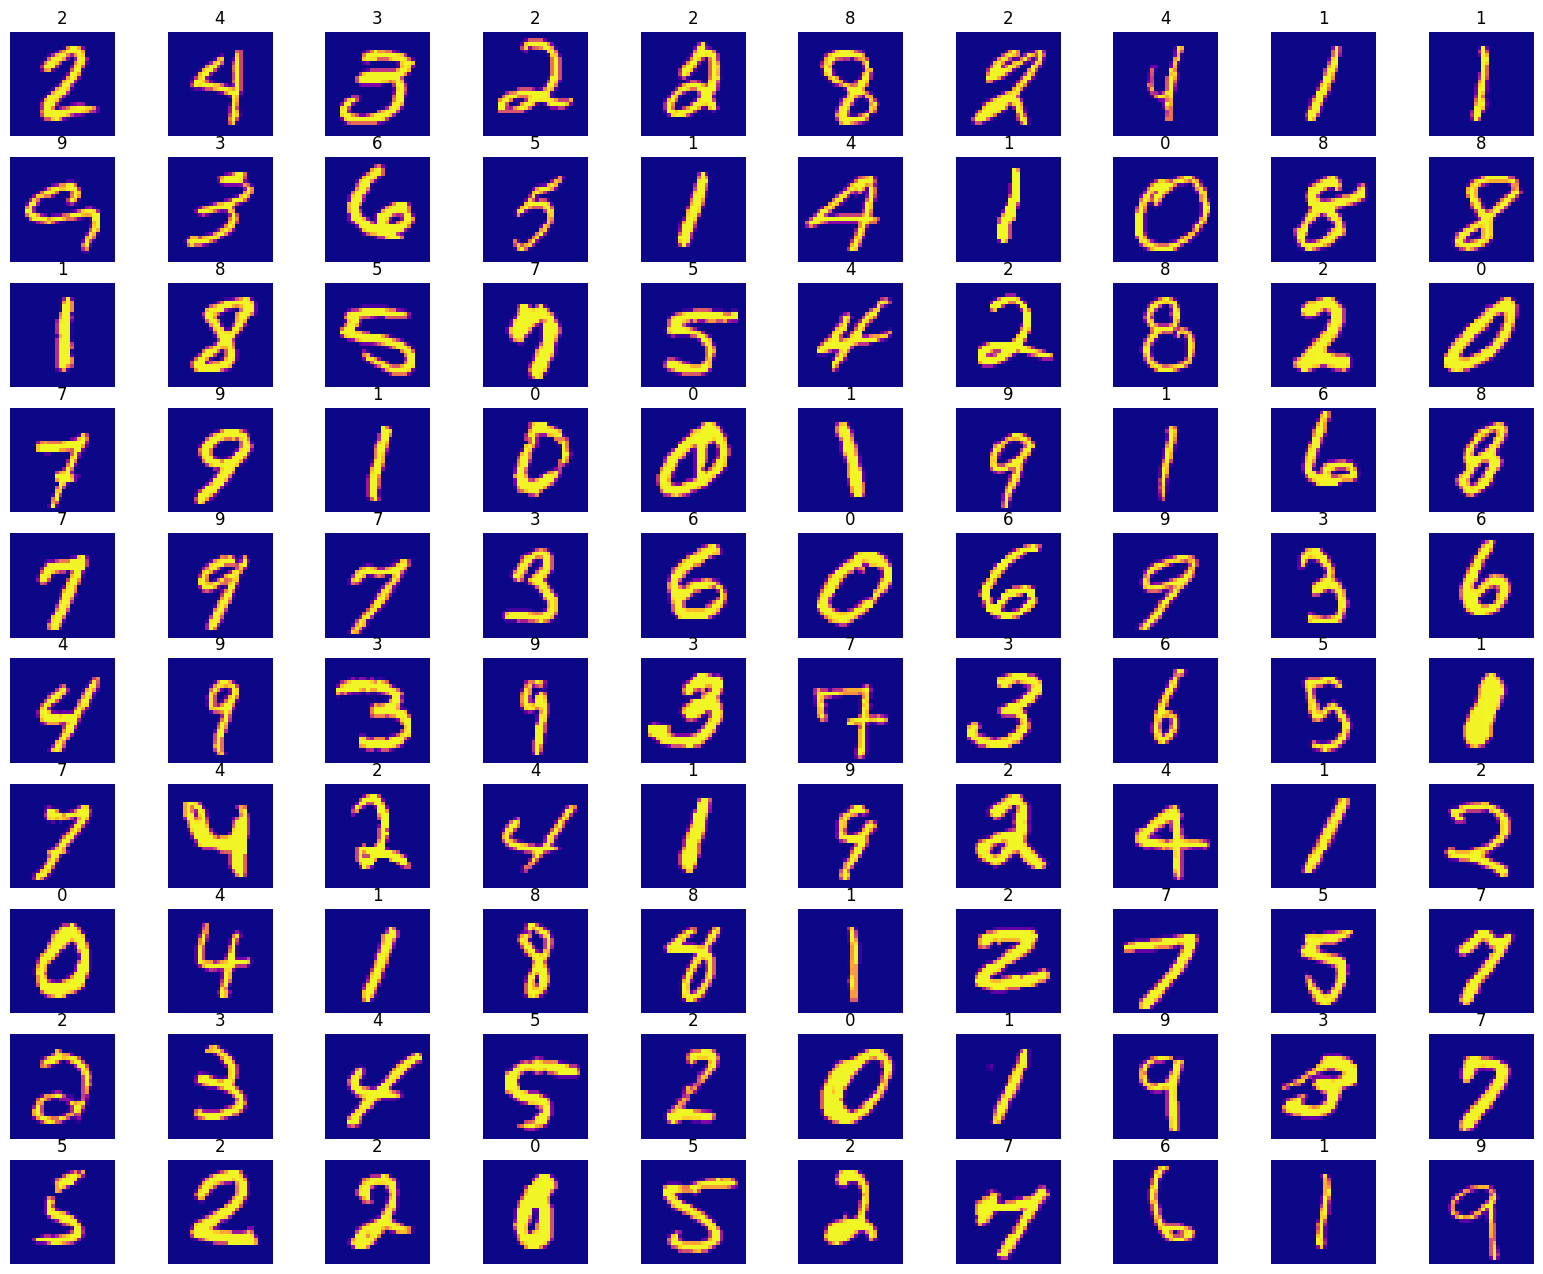

In [ ]:
# @title Visualisation of MNIST Dataset (cont.)

figure = plt.figure(figsize=(20, 16))
cols, rows = 10, 10

for i in range(1, cols * rows + 1):
  # get a random train_data
  idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='plasma')
plt.show()

In [ ]:
# @title Declaring Parameters for Training & Testing Data

from torch.utils.data import DataLoader
loaders = {
  'train': torch.utils.data.DataLoader(train_data,
                                       batch_size=100, # how many images to run at once
                                       shuffle=True,
                                       num_workers=1),
  'test': torch.utils.data.DataLoader(test_data,
                                      batch_size=100,
                                      shuffle=True,
                                      num_workers=1),
}

loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f490ead4760>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f490ead4910>}

In [ ]:
# @title Initialise the CNN (Convolutional Neural Network)

import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2,
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, 5, 1, 2),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )

    # fully connected layer, output 10 classes
    self.out = nn.Linear(32 * 7 * 7, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)

    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x # return x for visualisation

In [ ]:
# @title CNN

# cnn
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
# @title Cross-Entropy Loss Function
loss_func = nn.CrossEntropyLoss()   
print(loss_func)

CrossEntropyLoss()


In [ ]:
# @title Optimisation Function

from torch import optim
optimiser = optim.Adam(cnn.parameters(), lr=0.01)   
optimiser

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
# @title Training the Model

from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
  cnn.train()

  # train the model
  total_step = len(loaders['train'])
        
  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(loaders['train']):
          # gives batch data, normalize x when iterate train_loader
          b_x = Variable(images) # batch x
          b_y = Variable(labels) # batch y
          output = cnn(b_x)[0]               
          loss = loss_func(output, b_y)
            
          # clear gradients for this training step   
          optimiser.zero_grad()           
            
          # backpropagation, compute gradients 
          loss.backward()    
          # apply gradients             
          optimiser.step()                
            
          if (i+1) % 100 == 0:
              print('epoch [{}/{}] | step [{}/{}] | loss: {:.4f}'.format(
                  epoch + 1,
                  num_epochs,
                  i + 1,
                  total_step,
                  loss.item()
                ))
              pass
          pass
      pass

train(num_epochs, cnn, loaders)

epoch [1/10] | step [100/600] | loss: 0.1186
epoch [1/10] | step [200/600] | loss: 0.0773
epoch [1/10] | step [300/600] | loss: 0.0755
epoch [1/10] | step [400/600] | loss: 0.1712
epoch [1/10] | step [500/600] | loss: 0.0691
epoch [1/10] | step [600/600] | loss: 0.0727
epoch [2/10] | step [100/600] | loss: 0.0849
epoch [2/10] | step [200/600] | loss: 0.0515
epoch [2/10] | step [300/600] | loss: 0.0375
epoch [2/10] | step [400/600] | loss: 0.1137
epoch [2/10] | step [500/600] | loss: 0.0416
epoch [2/10] | step [600/600] | loss: 0.0898
epoch [3/10] | step [100/600] | loss: 0.1398
epoch [3/10] | step [200/600] | loss: 0.0567
epoch [3/10] | step [300/600] | loss: 0.0466
epoch [3/10] | step [400/600] | loss: 0.0444
epoch [3/10] | step [500/600] | loss: 0.0556
epoch [3/10] | step [600/600] | loss: 0.0995
epoch [4/10] | step [100/600] | loss: 0.0521
epoch [4/10] | step [200/600] | loss: 0.1349
epoch [4/10] | step [300/600] | loss: 0.0654
epoch [4/10] | step [400/600] | loss: 0.0636
epoch [4/1

In [ ]:
# @title Evaluate the model on testdata
def test():
  cnn.eval()
  with torch.no_grad():
    correct, total = 0, 0
    for images, labels in loaders['test']:
      test_output, last_layer = cnn(images)
      pred_y = torch.max(test_output, 1)[1].data.squeeze()
      accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
      # pass

    print('test accuracy: %.2f' % accuracy)
  # pass 

test() 

test accuracy: 0.99


In [ ]:
# @title Print 10 predictions from testdata
sample = next(iter(loaders['test']))
imgs, lbls = sample

# get the actual numbers
actual_number = lbls[:10].numpy()
# print(actual_number) 

# get the predicted numbers
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

print(f'predicted: {pred_y}')
print(f'actual: {actual_number}')

[4 2 8 8 8 2 7 3 5 3]
predicted: [4 2 8 8 8 2 7 3 5 3]
actual: [4 2 8 8 8 2 7 3 5 3]
